<a href="https://colab.research.google.com/github/MonicaIMorales/Data_Analytics_Portfolio/blob/main/HW_2_MNIST_data_Model3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

HW#2 MNIST Data

In [ ]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.utils import to_categorical
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout

In [ ]:
# 1. Load and Prepare Data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Reshape to 28*28 for Flatten layer
x_train = x_train.reshape(60000, 28, 28, 1)
x_test = x_test.reshape(10000, 28, 28, 1)

# Normalize
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# One-hot encode labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

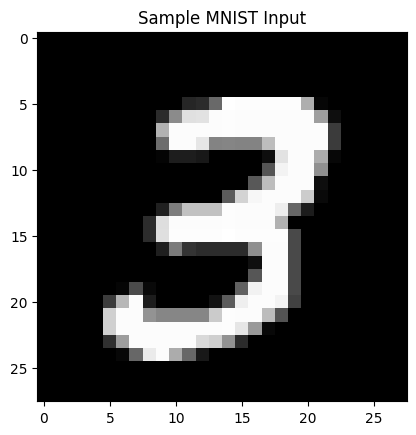

In [ ]:
# Sample index to display (pick whichever sample you want)
sample_index = 7

# Extract a sample image
sample_image = x_train[sample_index]

# Display the sample using matplotlib
plt.imshow(sample_image.reshape(28, 28), cmap='gray')
plt.title('Sample MNIST Input')
plt.show()

In [ ]:
# 2. Define the Model
model = Sequential()
model.add(Flatten(input_shape=(28, 28, 1)))  # Flatten input
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))  # Output layer (10 classes)

model.summary

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_7 (Dense)             (None, 128)               100480    
                                                                 
 batch_normalization_2 (Bat  (None, 128)               512       
 chNormalization)                                                
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_8 (Dense)             (None, 128)               16512     
                                                                 
 batch_normalization_3 (Bat  (None, 128)               512       
 chNormalization)                                     

In [ ]:
# 3. Compile the Model
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
# 4. Train the Model
model.fit(x_train, y_train, batch_size=64, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
938/938 [==============================] - 9s 8ms/step - loss: 0.3192 - accuracy: 0.9023 - val_loss: 0.1263 - val_accuracy: 0.9600
Epoch 2/10
938/938 [==============================] - 6s 7ms/step - loss: 0.1608 - accuracy: 0.9510 - val_loss: 0.0908 - val_accuracy: 0.9702
Epoch 3/10
938/938 [==============================] - 7s 8ms/step - loss: 0.1288 - accuracy: 0.9600 - val_loss: 0.0856 - val_accuracy: 0.9728
Epoch 4/10
938/938 [==============================] - 7s 8ms/step - loss: 0.1107 - accuracy: 0.9659 - val_loss: 0.0862 - val_accuracy: 0.9747
Epoch 5/10
938/938 [==============================] - 6s 7ms/step - loss: 0.1002 - accuracy: 0.9681 - val_loss: 0.0695 - val_accuracy: 0.9778
Epoch 6/10
938/938 [==============================] - 8s 8ms/step - loss: 0.0913 - accuracy: 0.9708 - val_loss: 0.0773 - val_accuracy: 0.9764
Epoch 7/10
938/938 [==============================] - 6s 6ms/step - loss: 0.0839 - accuracy: 0.9727 - val_loss: 0.0689 - val_accuracy: 0.9783
Epoch 

In [ ]:
evaluation = model.evaluate(x_test, y_test)
print('Test Loss:', evaluation[0])
print('Test Accuracy:', evaluation[1])

313/313 [==============================] - 1s 2ms/step - loss: 0.0626 - accuracy: 0.9800
Test Loss: 0.06261064857244492
Test Accuracy: 0.9800000190734863
